In [133]:
import pandas as pd

#### Read the 'avocado.csv' with pandas. Make sure a new unnecessary column is not generated.

In [134]:
# TODO
data = pd.read_csv("avocado.csv", index_col=[0])
data.describe()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year
count,18249.000000,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,18249.000000,18249.000000
mean,1.405978,8.506440e+05,2.930084e+05,2.951546e+05,2.283974e+04,2.396392e+05,1.821947e+05,5.433809e+04,3106.426507,2016.147899
std,0.402677,3.453545e+06,1.264989e+06,1.204120e+06,1.074641e+05,9.862424e+05,7.461785e+05,2.439660e+05,17692.894652,0.939938
min,0.440000,8.456000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,2015.000000
25%,1.100000,1.083858e+04,8.540700e+02,3.008780e+03,0.000000e+00,5.088640e+03,2.849420e+03,1.274700e+02,0.000000,2015.000000
50%,1.370000,1.073768e+05,8.645300e+03,2.906102e+04,1.849900e+02,3.974383e+04,2.636282e+04,2.647710e+03,0.000000,2016.000000
75%,1.660000,4.329623e+05,1.110202e+05,1.502069e+05,6.243420e+03,1.107834e+05,8.333767e+04,2.202925e+04,132.500000,2017.000000
max,3.250000,6.250565e+07,2.274362e+07,2.047057e+07,2.546439e+06,1.937313e+07,1.338459e+07,5.719097e+06,551693.650000,2018.000000


#### Explore the dataset, pay attention to redundancies, note the categorical (non-numeric) variables.

In [135]:
# TODO
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18249 entries, 0 to 11
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          18249 non-null  object 
 1   AveragePrice  18249 non-null  float64
 2   Total Volume  18249 non-null  float64
 3   4046          18249 non-null  float64
 4   4225          18249 non-null  float64
 5   4770          18249 non-null  float64
 6   Total Bags    18249 non-null  float64
 7   Small Bags    18249 non-null  float64
 8   Large Bags    18249 non-null  float64
 9   XLarge Bags   18249 non-null  float64
 10  type          18249 non-null  object 
 11  year          18249 non-null  int64  
 12  region        18249 non-null  object 
dtypes: float64(9), int64(1), object(3)
memory usage: 1.9+ MB


#### Drop the unnecessary columns, if any. 

In [136]:
# TODO
data = data.drop(columns = ['Date', 'Total Bags'])
data.head()

,AveragePrice,Total Volume,4046,4225,4770,Small Bags,Large Bags,XLarge Bags,type,year,region
0,1.33,64236.62,1036.74,54454.85,48.16,8603.62,93.25,0.0,conventional,2015,Albany
1,1.35,54876.98,674.28,44638.81,58.33,9408.07,97.49,0.0,conventional,2015,Albany
2,0.93,118220.22,794.70,109149.67,130.50,8042.21,103.14,0.0,conventional,2015,Albany
3,1.08,78992.15,1132.00,71976.41,72.58,5677.40,133.76,0.0,conventional,2015,Albany
4,1.28,51039.60,941.48,43838.39,75.78,5986.26,197.69,0.0,conventional,2015,Albany


#### Choose the 'AveragePrice' column as your target (y) variable.

In [149]:
# TODO
#X = data[data.columns.difference(['AveragePrice'])]
#y = data["AveragePrice"]

X = data.iloc[:,1:].values
y = data.iloc[:,0].values
# print(c)
#print(c)
print(X)
print(y)


[[64236.62 1036.74 54454.85 ... 'conventional' 2015 'Albany']
 [54876.98 674.28 44638.81 ... 'conventional' 2015 'Albany']
 [118220.22 794.7 109149.67 ... 'conventional' 2015 'Albany']
 ...
 [13766.76 1191.92 2452.79 ... 'organic' 2018 'WestTexNewMexico']
 [16205.22 1527.63 2981.04 ... 'organic' 2018 'WestTexNewMexico']
 [17489.58 2894.77 2356.13 ... 'organic' 2018 'WestTexNewMexico']]
[1.33 1.35 0.93 ... 1.87 1.93 1.62]


#### Plot the relationship of each of the numerical features with the target variable

Text(18.0, 0.5, '4770')

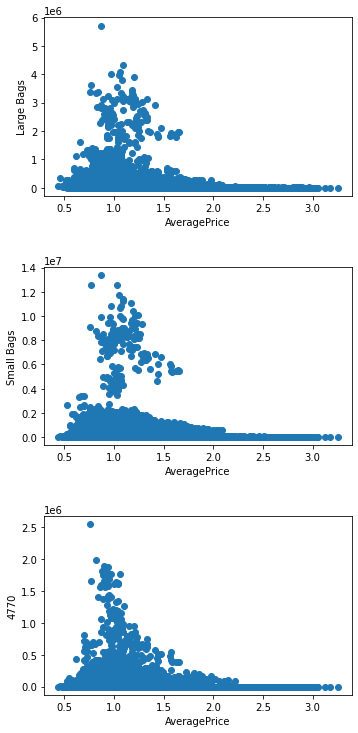

In [144]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(3, 1)
fig.set_figwidth(5)
fig.set_figheight(10)
fig.tight_layout(h_pad = 5)

axs[0].scatter(data['AveragePrice'], data['Large Bags'])
axs[0].set_xlabel('AveragePrice')
axs[0].set_ylabel('Large Bags')

axs[1].scatter(data['AveragePrice'], data['Small Bags'])
axs[1].set_xlabel('AveragePrice')
axs[1].set_ylabel('Small Bags')

axs[2].scatter(data['AveragePrice'], data['4770'])
axs[2].set_xlabel('AveragePrice')
axs[2].set_ylabel('4770')

#### Convert categorical variables to numeric. 
#### Note: variables with little amount of unique values are better to be considered categoricals.

In [152]:
# TODO
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

labelencoder_X = LabelEncoder()
X[:, 9] = labelencoder_X.fit_transform(X[:, 9])
X[:, 7] = labelencoder_X.fit_transform(X[:, 7])
print(X)

[[64236.62 1036.74 54454.85 ... 0 2015 0]
 [54876.98 674.28 44638.81 ... 0 2015 0]
 [118220.22 794.7 109149.67 ... 0 2015 0]
 ...
 [13766.76 1191.92 2452.79 ... 1 2018 53]
 [16205.22 1527.63 2981.04 ... 1 2018 53]
 [17489.58 2894.77 2356.13 ... 1 2018 53]]


#### Devide data into Train and Test sets with the ratio 80:20.

In [153]:
# TODO
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data, y, train_size=0.8, test_size=0.2)

print(y_train)

[1.31 1.62 2.   ... 1.46 1.49 1.49]


#### Choose 5 most relevant features from dataset with 'Forward Selection' (find in your slides).

In [154]:
from sklearn.linear_model import LinearRegression
# TODO
# I'm not understood how will it work?, please describe more details in lesson!

ValueError: could not convert string to float: 'conventional'

In [155]:
from sklearn.metrics import mean_squared_error
# TODO
mean_squared_error(y_test, y_pred)

0.16869504445304406

#### Choose 5 most relevant features from dataset with 'Backward Selection' (find in your slides).

In [162]:
# TODO
# I'm not understood how will it work?, please describe more details in lesson!

ModuleNotFoundError: No module named 'statsmodels'

#### Choose only features for further which occur in both previous results.

In [157]:
# TODO


#### Implement the function `fit_1d_linear_regression` that takes a matrix $x$ and a vector $y$, and returns a numpy array , where the first element $\beta_0$ is the intercept of the line, and remainings are the coefficients of a features, like $\beta_1$, $\beta_2$, etc.

In [158]:
import numpy as np

def fit_1d_linear_regression(data_vector, response_vector):
    """
    :param data_vector: A pandas series object (i.e. a column of a dataframe),
                        where each element is a data point (x)
    :param response_vector: A pandas series object (i.e. a column of a dataframe),
                        where each element is label (y)
    :return: numpy array beta of coefficients of the regression
    
    Note: You can avoid the intercept for simplicity 
    or include the intercept for an extra point
    """
    
    # TODO
    
    x_mean = sum(data_vector) / len(data_vector)
    y_mean = sum(response_vector) / len(response_vector)
    a = sum((data_vector - x_mean) * (response_vector - y_mean)) / sum((data_vector - x_mean) ** 2)
    b = y_mean - a * x_mean
    return a, b

def pred(X, a, b):
    return a * X + b

a,b = fit_1d_linear_regression(np.array(X_train['Total Volume']), y_train)
pred(X_test['Total Volume'], a, b)

40    1.393531
31    1.414450
8     1.422674
10    1.413346
32    1.415478
        ...   
18    1.413295
1     1.318423
28    1.413829
40    1.423203
2     1.423211
Name: Total Volume, Length: 3650, dtype: float64

#### Now fit the data to LinearRegression model of sklearn.linear_model.

0.04067759683153693
[1.39353125 1.41444972 1.42267419 ... 1.41382937 1.42320339 1.42321098]


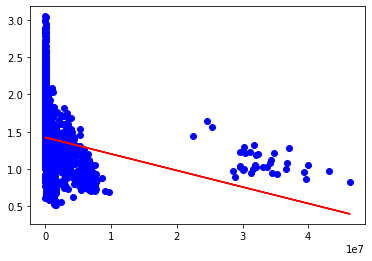

In [159]:
from sklearn.linear_model import LinearRegression

# TODO

regr = LinearRegression()

X_train = np.array(X_train['Total Volume']).reshape(-1, 1)
X_test = np.array(X_test['Total Volume']).reshape(-1, 1)

regr.fit(X_train, y_train)
print(regr.score(X_test, y_test))

y_pred = regr.predict(X_test)
print(y_pred)
plt.scatter(X_test, y_test, color ='b')
plt.plot(X_test, y_pred, color ='r')
  
plt.show()


#### Implement the following functions: mean_squared_error, mean_absolute_error, r2_score.
#### Each of them should have 2 vector arguments and return the appropriate score.

In [160]:
# TODO
def y_mean(y):
    return sum(y) / len(y)

def mse(y, y_pred):
    return np.sum((y_pred - y) ** 2) / len(y)
    
def mae(y, y_pred):
    return np.sum(np.abs(y_pred - y)) / len(y_pred)
    
def r2s(y, y_pred):
    return 1 - (np.sum((y - y_pred) ** 2) / np.sum((y - y.mean()) ** 2))

print(mse(y_test, y_pred))
print(mae(y_test, y_pred))
print(r2s(y_test, y_pred))

0.1541142140105342
0.3134291944769574
0.04067759683153693


#### Compare the resulting scores of your functions and scores of corresponding sklearn functions. They should be the same.

In [161]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# TODO
# Something is wrong but code is seem correct
y_train = np.array(y_train).reshape(-1, 1)
y_test = np.array(y_test).reshape(-1, 1)

print("Mean squared error: ")
print(mean_squared_error(y_test, y_pred))
print(mse(y_test, y_pred))

print("Mean absoulute error: ")
print(mean_absolute_error(y_test, y_pred))
print(mae(y_test, y_pred))

print("r2 score: ")
print(r2_score(y_test, y_pred))
print(r2s(y_test, y_pred))


Mean squared error: 
0.1541142140105342
607.5142066664035
Mean absoulute error: 
0.3134291944769574
1187.1404704525628
r2 score: 
0.04067759683153693
-3780.623858902204
